In [1]:
import pandas as pd
df=pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [3]:
df.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Text(0, 0.5, 'Sales')

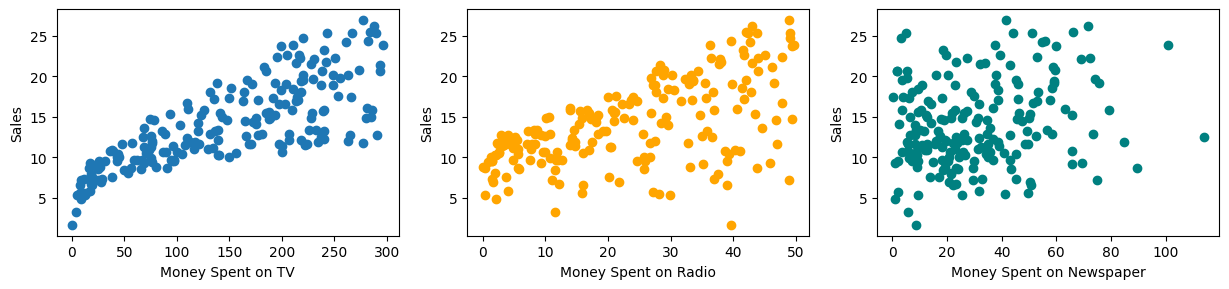

In [4]:
import matplotlib.pyplot as plt
graphSheet = plt.figure(figsize=(15,10))
graphSheet.add_subplot(3,3,1)
plt.scatter(df['TV'],df['sales'])
plt.xlabel("Money Spent on TV")
plt.ylabel("Sales")
graphSheet.add_subplot(3,3,2)
plt.scatter(df['radio'],df['sales'],c='orange')
plt.xlabel("Money Spent on Radio")
plt.ylabel("Sales")
graphSheet.add_subplot(3,3,3)
plt.scatter(df['newspaper'],df['sales'],c='teal')
plt.xlabel("Money Spent on Newspaper")
plt.ylabel("Sales")

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
import numpy as np
graphSheet = plt.figure(figsize=(15,10))
def linReg(x,y,z):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
    x_train = x_train.to_numpy().reshape(-1,1)
    x_test = x_test.to_numpy().reshape(-1,1)
    y_train = y_train.to_numpy().reshape(-1,1)
    y_test = y_test.to_numpy().reshape(-1,1)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    print("slope=",lr.coef_[0][0])
    print("Intercept=",lr.intercept_[0])
    pred = lr.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Root mean sqr err=",rmse)
    print("The linear model of TV versus Sales is: Y = {:.3} + {:.2}X".format(lr.intercept_[0], lr.coef_[0][0]))

    fig, ax = plt.subplots()
    ax.scatter(x_train,y_train)
    ax.scatter(x_test,y_test)
    ax.set_xlabel("Money Spent on")
    ax.set_ylabel("Sales")
    ax.set_title(z)
    ax.plot(x_test,pred,c='yellow')
    plt.show()

<Figure size 1500x1000 with 0 Axes>

slope= 0.04804174608312566
Intercept= 7.042322277414805
Root mean sqr err= 3.018243572770843
The linear model of TV versus Sales is: Y = 7.04 + 0.048X


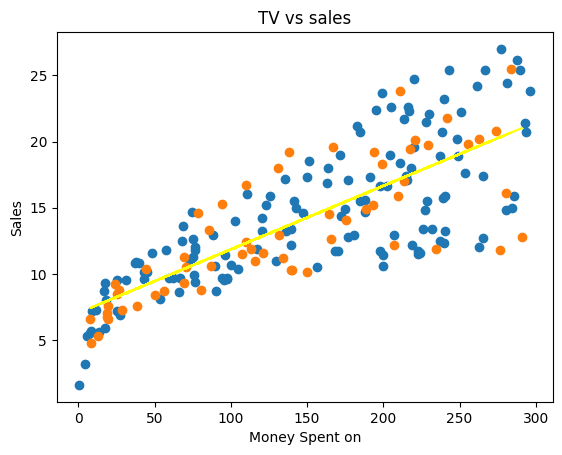

slope= 0.20104844646166015
Intercept= 9.193458502073602
Root mean sqr err= 4.018143281931979
The linear model of TV versus Sales is: Y = 9.19 + 0.2X


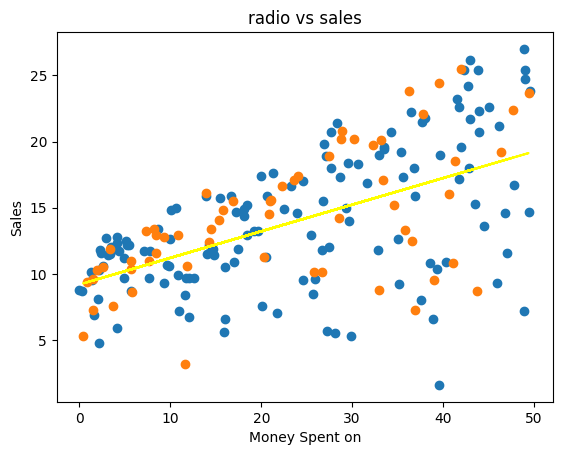

slope= 0.04501190159960958
Intercept= 12.449093751119117
Root mean sqr err= 5.139447823440313
The linear model of TV versus Sales is: Y = 12.4 + 0.045X


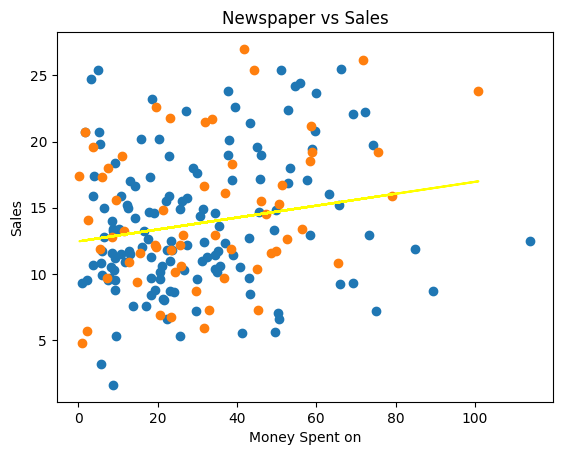

In [7]:
linReg(df['TV'],df['sales'],"TV vs sales")
linReg(df['radio'],df['sales'],"radio vs sales")
linReg(df['newspaper'],df['sales'],"Newspaper vs Sales")

***Inference:***

*Newspaper RMSE = 5.139447823440313*

*Radio RMSE = 4.018143281931979*

*TV RMSE = 3.018243572770843*

*The RMSE Value for TV is the least.*

*This means that the money spent on TV. Ads has the highest possiblity of a reliable sales income prediction*